In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
cols = ['Age','Sex','BP','Cholesterol','Na_to_K','Drug']

df = pd.read_csv('C:/vscode/ML_Practice/Yeho/classification/drug200.csv',names=cols)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,F,HIGH,HIGH,25.355,DrugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          201 non-null    object
 1   Sex          201 non-null    object
 2   BP           201 non-null    object
 3   Cholesterol  201 non-null    object
 4   Na_to_K      201 non-null    object
 5   Drug         201 non-null    object
dtypes: object(6)
memory usage: 9.6+ KB


In [5]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,201,201,201,201,201,201
unique,58,3,4,3,199,6
top,47,M,HIGH,HIGH,12.006,DrugY
freq,8,104,77,103,2,91


In [6]:
df.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df['Sex'] = df['Sex'].map({'M':int(0),'F':int(1)})

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,Age,NaN,BP,Cholesterol,Na_to_K,Drug
1,23,1.0,HIGH,HIGH,25.355,DrugY
2,47,0.0,LOW,HIGH,13.093,drugC
3,47,0.0,LOW,HIGH,10.114,drugC
4,28,1.0,NORMAL,HIGH,7.798,drugX


In [8]:
df = df.drop(index=df.index[0])

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,1.0,HIGH,HIGH,25.355,DrugY
2,47,0.0,LOW,HIGH,13.093,drugC
3,47,0.0,LOW,HIGH,10.114,drugC
4,28,1.0,NORMAL,HIGH,7.798,drugX
5,61,1.0,LOW,HIGH,18.043,DrugY


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    object 
 1   Sex          200 non-null    float64
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    object 
 5   Drug         200 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.5+ KB


In [11]:
df['Age'] = pd.to_numeric((df['Age']), errors='coerce')

df['Na_to_K'] = pd.to_numeric(df['Na_to_K'], errors='coerce')

df['BP'] = (df['BP'].map({'HIGH':int(2),'NORMAL':int(1),'LOW':int(0)}))

df['Cholesterol'] = (df['Cholesterol'].map({'HIGH':int(1),'NORMAL':int(0)}))


df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,1.0,2,1,25.355,DrugY
2,47,0.0,0,1,13.093,drugC
3,47,0.0,0,1,10.114,drugC
4,28,1.0,1,1,7.798,drugX
5,61,1.0,0,1,18.043,DrugY


In [12]:
df['Drug'] = (df['Drug'].map({'drugA':int(0),'drugB':int(1),'drugC':int(2),'drugX':int(3),'DrugY':int(4)}))

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,1.0,2,1,25.355,4
2,47,0.0,0,1,13.093,2
3,47,0.0,0,1,10.114,2
4,28,1.0,1,1,7.798,3
5,61,1.0,0,1,18.043,4


In [13]:
df.describe()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.480000,1.065000,0.515000,16.084485,2.870000
std,16.544315,0.500854,0.839224,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,0.000000,1.000000,1.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    float64
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 9.5 KB


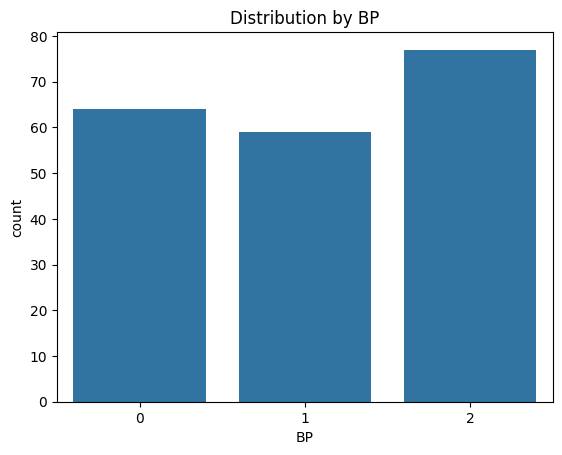

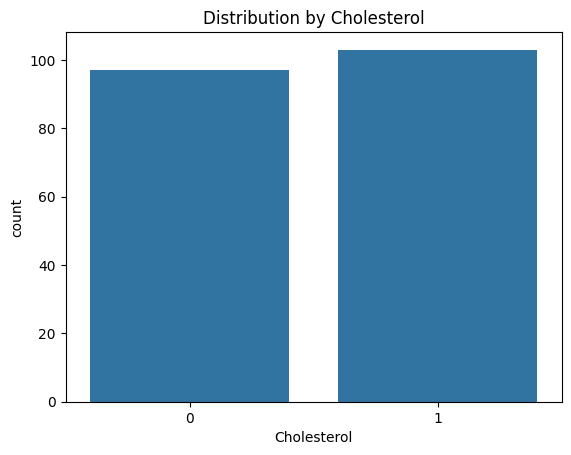

In [15]:
sns.countplot(x='BP', data=df)
plt.title('Distribution by BP')
plt.show()


sns.countplot(x='Cholesterol', data=df)
plt.title('Distribution by Cholesterol')
plt.show()

In [16]:
y = df['Drug']

X = df.drop(['Drug'], axis=1)

X, y

(     Age  Sex  BP  Cholesterol  Na_to_K
 1     23  1.0   2            1   25.355
 2     47  0.0   0            1   13.093
 3     47  0.0   0            1   10.114
 4     28  1.0   1            1    7.798
 5     61  1.0   0            1   18.043
 ..   ...  ...  ..          ...      ...
 196   56  1.0   0            1   11.567
 197   16  0.0   0            1   12.006
 198   52  0.0   1            1    9.894
 199   23  0.0   1            0   14.020
 200   40  1.0   0            0   11.349
 
 [200 rows x 5 columns],
 1      4
 2      2
 3      2
 4      3
 5      4
       ..
 196    2
 197    2
 198    3
 199    3
 200    3
 Name: Drug, Length: 200, dtype: int64)

In [17]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         3
           2       1.00      0.17      0.29         6
           3       0.78      1.00      0.88        18
           4       1.00      0.96      0.98        26

    accuracy                           0.90        60
   macro avg       0.91      0.83      0.80        60
weighted avg       0.92      0.90      0.88        60



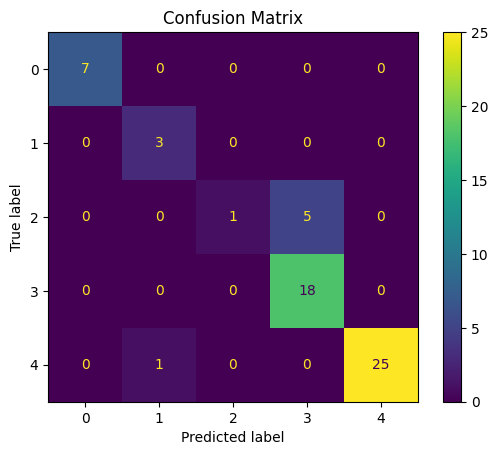

In [25]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
log_model = LogisticRegression(max_iter=3000)

log_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = log_model.predict(X_test)

print(classification_report(y_test, y_pred))
y_pred = log_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.55      0.94      0.69        18
           4       0.90      1.00      0.95        26

    accuracy                           0.72        60
   macro avg       0.29      0.39      0.33        60
weighted avg       0.55      0.72      0.62        60



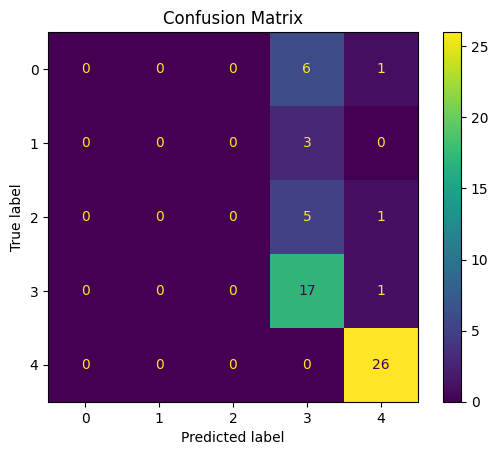

In [26]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.35      0.86      0.50         7
           1       0.40      0.67      0.50         3
           2       1.00      0.17      0.29         6
           3       0.64      0.39      0.48        18
           4       1.00      1.00      1.00        26

    accuracy                           0.70        60
   macro avg       0.68      0.62      0.55        60
weighted avg       0.79      0.70      0.69        60



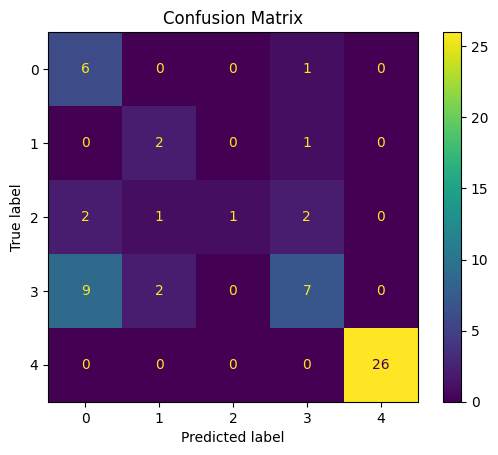

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(3)

knn_model = knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))
y_pred = knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.50      1.00      0.67         3
           2       0.75      1.00      0.86         6
           3       1.00      1.00      1.00        18
           4       1.00      0.77      0.87        26

    accuracy                           0.90        60
   macro avg       0.82      0.95      0.87        60
weighted avg       0.94      0.90      0.90        60



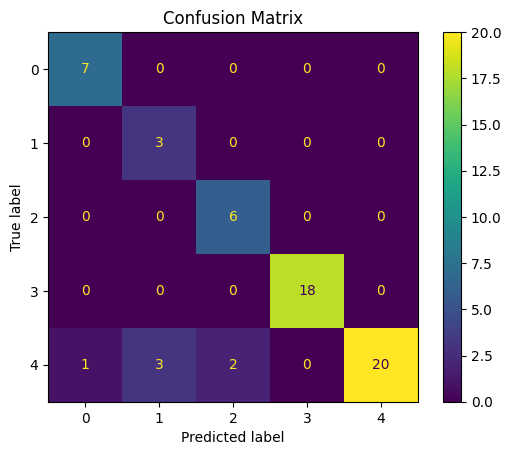

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model = nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print(classification_report(y_test, y_pred))
y_pred = nb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

